In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
latestDate = (session.query(Measurement.date)
                     .order_by(Measurement.date.desc())
                     .first())
print(latestDate)


('2017-08-23',)


<AxesSubplot:xlabel='date', ylabel='precipation'>

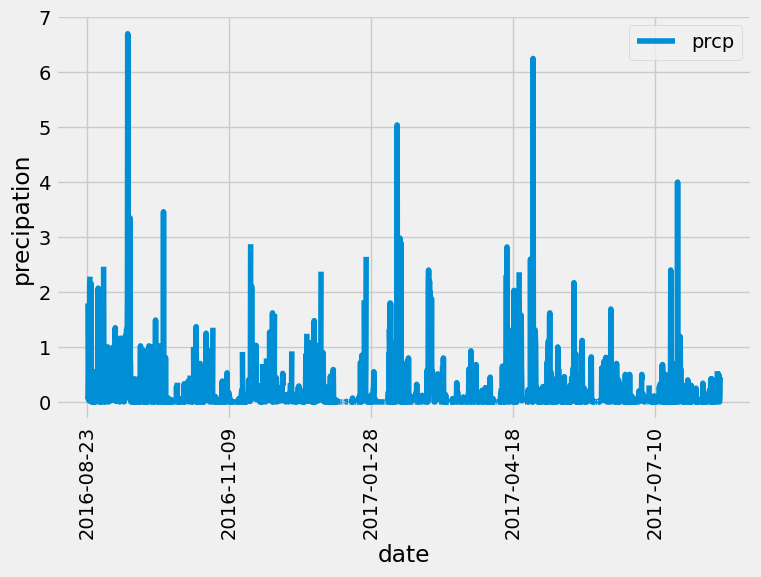

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

# Perform a query to retrieve the data and precipitation scores
recent_12_data = session.query(Measurement).filter(Measurement.date >= '2016-08-23')


# Save the query results as a Pandas DataFrame and set the index to the date column
date_prcp_df = pd.read_sql(recent_12_data.statement, recent_12_data.session.bind)
date_prcp_df = date_prcp_df.drop(columns=['id','station','tobs'])
date_prcp_df = date_prcp_df.set_index('date')

# Sort the dataframe by date
date_prcp_df = date_prcp_df.sort_values(by = 'date')


# Use Pandas Plotting with Matplotlib to plot the data
date_prcp_df.plot(ylabel = 'precipation', use_index = True, figsize=(8, 5),rot=90)

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
date_prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
stationsCount = session.query(Station).count()
print(f"Station Count: {stationsCount}")


Station Count: 9


In [28]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
group = session.query(Measurement).group_by(Measurement.station)
count = []
for c in group:
    count.append(session.query(Measurement).filter(Measurement.station == c.station).count())
    print(c.station, session.query(Measurement).filter(Measurement.station == c.station).count())
    max_count = max(count)
    if session.query(Measurement).filter(Measurement.station == c.station).count() == max_count:
        most_active_station = c.station

print(most_active_station)
# List the stations and the counts in descending order.

session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

USC00511918 1979
USC00513117 2709
USC00514830 2202
USC00516128 2612
USC00517948 1372
USC00518838 511
USC00519281 2772
USC00519397 2724
USC00519523 2669
USC00519281


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [29]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

tobs = session.query(Measurement).filter(Measurement.station == most_active_station)
tobs_of_most_active_station = []
for t in tobs:
    tobs_of_most_active_station.append(t.tobs)

lowest_temp = min(tobs_of_most_active_station)
highest_temp = max(tobs_of_most_active_station)
from statistics import mean
average_temp = mean(tobs_of_most_active_station)

print( f"In the most active station ({most_active_station}), the lowest temperature recorded there is {lowest_temp} degrees Farenheit, highest temperature recorded there is {highest_temp} degrees Farenheit, and the average temperature recorded there is {average_temp} degrees Farenheit.")


In the most active station (USC00519281), the lowest temperature recorded there is 54.0 degrees Farenheit, highest temperature recorded there is 85.0 degrees Farenheit, and the average temperature recorded there is 71.66378066378067 degrees Farenheit.


<AxesSubplot:ylabel='Frequency'>

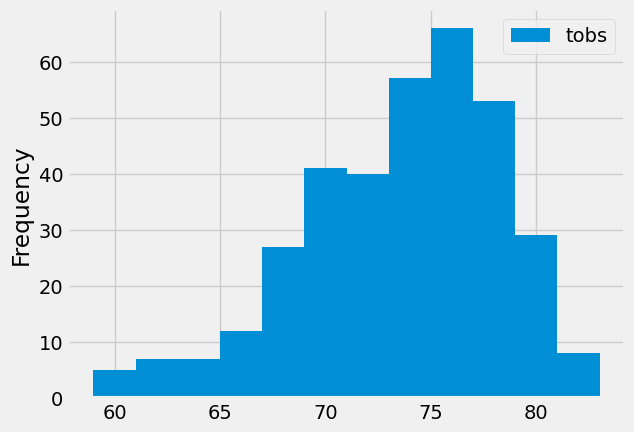

In [30]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

tempData = (session.query(Measurement.date, Measurement.tobs)
                   .filter(Measurement.date >= '2016-08-23')
                   .filter(Measurement.station == most_active_station)
                   .order_by(Measurement.date)
                   .all())

tempTable = pd.DataFrame(tempData)
tempTable = tempTable.set_index('date')

tempTable = tempTable.sort_index(ascending=True)
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

tempTable.plot(kind='hist', bins=12)



# Close session

In [106]:
# Close Session
session.close()